<a href="https://colab.research.google.com/github/jhuang12/Tensorflow-for-personality-items-classification/blob/master/191216TF_IPIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#THIS NOTEBOOK WAS CREATED TO USE TF NLP FOR IPIP ITEMS

In [0]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [0]:
!pip install tensorflow==2.0.0

DATA LOADING

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# dpath = os.path.join(r"C:/Users/amead/Google Drive/active/machine learning/big5/big_five_items.csv")
dpath = os.path.join("/content/drive/My Drive/big_five_items.csv")

In [0]:
data = pd.read_csv(dpath,low_memory = False, sep = "\t", lineterminator = '\n', encoding = 'utf-8')

DATA PROCESSING


In [9]:
#stem as one string
sentences = pd.Series(data['Stem'])
sentences

0                                    I seldom feel blue.
1        I am not interested in other people's problems.
2                                  I carry out my plans.
3                                 I make friends easily.
4                       I am quick to understand things.
                             ...                        
650                       I'm pretty stable emotionally.
651                                      I laugh easily.
652    I believe that the "new morality" of a permiss...
653    I would rather be known as "merciful" than as ...
654            I think twice before I answer a question.
Name: Stem, Length: 655, dtype: object

In [10]:
#scale as categorical data
data['labels'] = data['Scale'].astype('category').cat.codes
data.head()

,#ID,Scale Item ID,Scale,Direction,Stem,Instrument,labels
0,1,1,Neuroticism,-,I seldom feel blue.,BFAS,3
1,2,2,Agreeableness,-,I am not interested in other people's problems.,BFAS,0
2,3,3,Conscientiousness,+,I carry out my plans.,BFAS,1
3,4,4,Extraversion,+,I make friends easily.,BFAS,2
4,5,5,Openness,+,I am quick to understand things.,BFAS,4


In [11]:
labels = np.array(pd.Series(data['labels']))
labels

array([3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0,
       1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2,
       4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3,
       0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 3, 0, 1,
       2, 4, 3, 0, 1, 2, 4, 3, 0, 1, 2, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4,
       2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0,
       1, 3, 4, 2, 0, 1, 3, 4, 4, 0, 1, 4, 4, 2, 2, 0, 2, 0, 3, 4, 4, 2,
       3, 2, 2, 2, 3, 2, 4, 1, 3, 1, 1, 0, 0, 1, 4, 1, 3, 0, 0, 0, 4, 4,
       4, 0, 2, 3, 4, 0, 1, 0, 1, 0, 3, 1, 2, 3, 3, 1, 2, 2, 3, 0, 2, 1,
       3, 3, 4, 0, 1, 1, 2, 0, 4, 0, 2, 1, 3, 0, 4, 1, 4, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 2, 4, 4, 3, 3, 1, 4, 0, 4, 2, 2, 3, 4, 3, 3, 0, 0, 2,
       3, 1, 3, 1, 1, 1, 3, 1, 2, 0, 4, 0, 2, 1, 4, 1, 2, 0, 2, 3, 4, 2,
       3, 0, 2, 0, 4, 3, 4, 4, 4, 0, 2, 4, 4, 0, 1, 1, 4, 0, 3, 0, 1, 2,
       3, 1, 2, 3, 0, 2, 0, 0, 4, 1, 3, 3, 3, 3, 4,

DATA CLEANING (STEMMING)

TOKENIZATION AND PADDING

In [0]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(oov_token = "<OOV>", num_words = 10000)
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index
# print(word_index)

# sequences = tokenizer.texts_to_sequences(sentences)
# padded = pad_sequences(sequences, padding = 'pre')
# print(padded[0])
# print(padded.shape)

In [0]:
#split training and validation sample
#training_data, training_labels = np.asarray(padded[ :524]), labels[ :524]
#test_data, test_labels = np.asarray(padded[525: ]), labels[525: ]

TRAINING

In [0]:
import random 
random.seed(700)

In [0]:
#stratified random sampling training and validation sample by dimensions

training_data = []
training_labels = []
validation_data = []
validation_labels = []

for s in range(5):
  #print(s)
  training_set = data.loc[data['labels'] == s, 'Stem'].sample(frac = 0.7, replace = False, random_state = 1)
  training_l = np.array([s]*len(training_set))

  validation_set = data.loc[(~data['Stem'].isin(training_set)) & (data['labels'] == s), 'Stem']
  validation_l = np.array([s]*len(validation_set))

  #print(len(training_set))
  #print(len(validation_set))

  training_data.extend(training_set)
  training_labels.extend(training_l)

  validation_data.extend(validation_set)
  validation_labels.extend(validation_l)

  #print(len(training_data))
  #print(len(validation_data))


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 10000

def sequence_vectorization (train_texts, val_texts): 
  """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
  """
  tokenizer = Tokenizer(oov_token = "<OOV>", num_words = MAX_LENGTH)
  # Create vocabulary with training texts.
  tokenizer.fit_on_texts(train_texts)
  x_train = tokenizer.texts_to_sequences(train_texts)
  x_val = tokenizer.texts_to_sequences(val_texts)
  
  # Get max sequence length.
  max_length = len(max(x_train, key=len))
  
  if max_length > MAX_LENGTH:
    max_length = MAX_LENGTH
 
# Fix sequence length to max value. Sequences shorter than the length are
# padded in the beginning and sequences longer are truncated
# at the beginning.
  x_train = np.asarray(pad_sequences(x_train, maxlen=max_length))
  x_val = np.asarray(pad_sequences(x_val, maxlen=max_length))

  return x_train, x_val, tokenizer.word_index

In [0]:
train_vec, val_vec, word_index = sequence_vectorization(training_data, validation_data)

In [0]:
training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)

In [0]:
#summary of tokenization - validation data
# print(tokenizer.word_counts)
# print(tokenizer.document_count)
# print(tokenizer.word_index)
# print(tokenizer.word_docs)

MODEL BUILING - MLP

In [0]:
ACCURACY_STOP = 0.95

class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy')> ACCURACY_STOP):
      self.model.stop_training = True
      print("\nReach accuracy of 95% and stop training!")

callbacks = myCallbacks()

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_directory = '/content/drive/My Drive/NLP_tensorflow/sequentia_model.h5'

checkpoint = ModelCheckpoint(checkpoint_directory,
                             monitor = "val_accuracy", 
                             save_best_only = True, 
                             mode = 'max')

In [0]:
def _get_last_layer_units_and_activation(num_classes):
    """Gets the # units and activation function for the last network layer.

    # Arguments
        num_classes: int, number of classes.

    # Returns
        units, activation values.
    """
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation

In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

In [0]:
def mlp_model(layers, units, dropout_rate, num_classes):
    """Creates an instance of a multi-layer perceptron model.

    # Arguments
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of the layers.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.

    # Returns
        An MLP model instance.
    """
    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    #model.add(Dropout(rate = dropout_rate)
    
    for i in range(layers-1):
      model.add(Dense(units = units, activation='relu'))
      model.add(Dropout(rate = dropout_rate))

    model.add(Dense(units=op_units, activation=op_activation))
    return model

In [0]:
layers = 2
units = 16
dropout_rate = 0.1
#input_shape = 1
num_classes = 5

In [0]:
mlp_model = mlp_model(layers, units, dropout_rate, num_classes)

In [0]:
mlp_model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [43]:
NUM_EPOCHS = 500
history = mlp_model.fit(train_vec, training_labels,
                    validation_data = (val_vec, validation_labels),
                    epochs = NUM_EPOCHS, 
                    callbacks = [checkpoint, callbacks])

Train on 459 samples, validate on 183 samples
Epoch 1/500
459/459 [==============================] - 0s 78us/sample - loss: 1.1341 - accuracy: 0.4662 - val_loss: 15.6513 - val_accuracy: 0.2131
Epoch 2/500
459/459 [==============================] - 0s 68us/sample - loss: 1.1361 - accuracy: 0.4728 - val_loss: 15.6602 - val_accuracy: 0.2131
Epoch 3/500
459/459 [==============================] - 0s 72us/sample - loss: 1.1432 - accuracy: 0.4684 - val_loss: 15.6631 - val_accuracy: 0.2077
Epoch 4/500
459/459 [==============================] - 0s 87us/sample - loss: 1.1541 - accuracy: 0.4749 - val_loss: 15.9848 - val_accuracy: 0.2077
Epoch 5/500
459/459 [==============================] - 0s 75us/sample - loss: 1.1478 - accuracy: 0.4706 - val_loss: 15.8133 - val_accuracy: 0.2077
Epoch 6/500
459/459 [==============================] - 0s 76us/sample - loss: 1.1306 - accuracy: 0.4728 - val_loss: 15.8125 - val_accuracy: 0.2022
Epoch 7/500
459/459 [==============================] - 0s 71us/sample - 

MODEL BUILDING CNN, RNN, AND LSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 28,517
Trainable params: 28,517
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [47]:
NUM_EPOCHS = 300
history = model.fit(train_vec, training_labels,
                    validation_data = (val_vec, validation_labels),
                    epochs = NUM_EPOCHS, 
                    callbacks = [checkpoint, callbacks])

Train on 459 samples, validate on 183 samples
Epoch 1/300
459/459 [==============================] - 1s 2ms/sample - loss: 1.6113 - accuracy: 0.2026 - val_loss: 1.6116 - val_accuracy: 0.2022
Epoch 2/300
459/459 [==============================] - 0s 263us/sample - loss: 1.6107 - accuracy: 0.2026 - val_loss: 1.6113 - val_accuracy: 0.2022
Epoch 3/300
459/459 [==============================] - 0s 269us/sample - loss: 1.6104 - accuracy: 0.2026 - val_loss: 1.6110 - val_accuracy: 0.2022
Epoch 4/300
459/459 [==============================] - 0s 290us/sample - loss: 1.6102 - accuracy: 0.2026 - val_loss: 1.6109 - val_accuracy: 0.2022
Epoch 5/300
459/459 [==============================] - 0s 295us/sample - loss: 1.6102 - accuracy: 0.2026 - val_loss: 1.6106 - val_accuracy: 0.2022
Epoch 6/300
459/459 [==============================] - 0s 298us/sample - loss: 1.6101 - accuracy: 0.2026 - val_loss: 1.6105 - val_accuracy: 0.2022
Epoch 7/300
459/459 [==============================] - 0s 305us/sample - l

MODEL PERFORMANCE

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

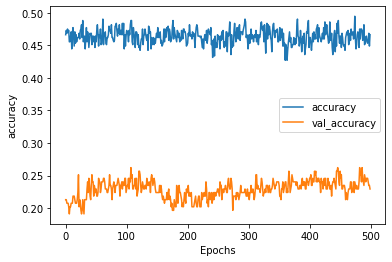

In [45]:
plot_graphs(history, 'accuracy')

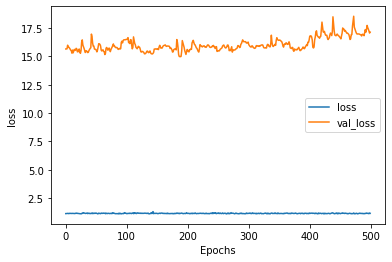

In [46]:
plot_graphs(history, 'loss')

USE SINGLE LAYER LSTM

In [0]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [0]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 138,629
Trainable params: 138,629
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [0]:
model1.fit(training_data, training_labels,
                    validation_data=(test_data, test_labels),
                    epochs=30, 
                    callbacks = [ callbacks])

Train on 524 samples, validate on 130 samples
Epoch 1/30
524/524 [==============================] - 4s 7ms/sample - loss: 1.6114 - accuracy: 0.1698 - val_loss: 1.6081 - val_accuracy: 0.2615
Epoch 2/30
524/524 [==============================] - 0s 878us/sample - loss: 1.6036 - accuracy: 0.3130 - val_loss: 1.6047 - val_accuracy: 0.2462
Epoch 3/30
524/524 [==============================] - 0s 860us/sample - loss: 1.5803 - accuracy: 0.3989 - val_loss: 1.5904 - val_accuracy: 0.2692
Epoch 4/30
524/524 [==============================] - 0s 920us/sample - loss: 1.4938 - accuracy: 0.5706 - val_loss: 1.5262 - val_accuracy: 0.3154
Epoch 5/30
524/524 [==============================] - 0s 838us/sample - loss: 1.2412 - accuracy: 0.4981 - val_loss: 1.4824 - val_accuracy: 0.3308
Epoch 6/30
524/524 [==============================] - 0s 857us/sample - loss: 0.9039 - accuracy: 0.6679 - val_loss: 1.5757 - val_accuracy: 0.3231
Epoch 7/30
524/524 [==============================] - 0s 863us/sample - loss: 0.

USE MULTIPLE LAYER LSTM

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [0]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 175,749
Trainable params: 175,749
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
)

In [0]:
model2.fit(training_data, training_labels,
           validation_data=(test_data, test_labels),
           epochs=30, 
           callbacks = [ callbacks])

Train on 524 samples, validate on 130 samples
Epoch 1/30
524/524 [==============================] - 7s 13ms/sample - loss: 1.6113 - accuracy: 0.1832 - val_loss: 1.6093 - val_accuracy: 0.1538
Epoch 2/30
524/524 [==============================] - 1s 2ms/sample - loss: 1.6056 - accuracy: 0.2195 - val_loss: 1.6075 - val_accuracy: 0.2000
Epoch 3/30
524/524 [==============================] - 1s 2ms/sample - loss: 1.5872 - accuracy: 0.3607 - val_loss: 1.5987 - val_accuracy: 0.2692
Epoch 4/30
524/524 [==============================] - 1s 1ms/sample - loss: 1.3670 - accuracy: 0.5458 - val_loss: 1.8439 - val_accuracy: 0.2769
Epoch 5/30
524/524 [==============================] - 1s 2ms/sample - loss: 0.7848 - accuracy: 0.6927 - val_loss: 2.0417 - val_accuracy: 0.3308
Epoch 6/30
524/524 [==============================] - 1s 2ms/sample - loss: 0.3752 - accuracy: 0.8912 - val_loss: 2.7186 - val_accuracy: 0.3385
Epoch 7/30
512/524 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 

USE GRU

In [0]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64, input_length=24),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 24, 64)            64000     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 35        
Total params: 83,241
Trainable params: 83,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.fit(training_data, training_labels,
                    validation_data=(test_data, test_labels),
                    epochs=30, 
                    callbacks = [ callbacks])

Train on 524 samples, validate on 130 samples
Epoch 1/30
524/524 [==============================] - 4s 7ms/sample - loss: 1.6102 - accuracy: 0.2099 - val_loss: 1.6057 - val_accuracy: 0.2462
Epoch 2/30
524/524 [==============================] - 0s 662us/sample - loss: 1.5952 - accuracy: 0.2538 - val_loss: 1.6034 - val_accuracy: 0.2000
Epoch 3/30
524/524 [==============================] - 0s 628us/sample - loss: 1.5684 - accuracy: 0.2309 - val_loss: 1.5907 - val_accuracy: 0.2308
Epoch 4/30
524/524 [==============================] - 0s 686us/sample - loss: 1.5167 - accuracy: 0.2653 - val_loss: 1.5860 - val_accuracy: 0.2231
Epoch 5/30
524/524 [==============================] - 0s 658us/sample - loss: 1.4132 - accuracy: 0.3588 - val_loss: 1.6173 - val_accuracy: 0.3231
Epoch 6/30
524/524 [==============================] - 0s 630us/sample - loss: 1.2616 - accuracy: 0.4866 - val_loss: 1.5625 - val_accuracy: 0.3538
Epoch 7/30
524/524 [==============================] - 0s 637us/sample - loss: 1.

In [0]:
#clear the trained models
tf.keras.backend.clear_session()